In [2]:
# from Encoder import Encoder
# from exampleData import sample4
import numpy as np
import matplotlib.pyplot as plt



In [3]:
array = np.load('compressed_indices.npy')


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47] [25740 15029  9424  7511  5962  5365  4066  3388  2737  2923  2084  1825
  2296  1482  1651   887   942  1159   930   971   885   588   531   391
   579   320   284    96    93    41    20    14    25    55     8    83
    40     5     1    33    23    48    27     1    37    14    23     1]


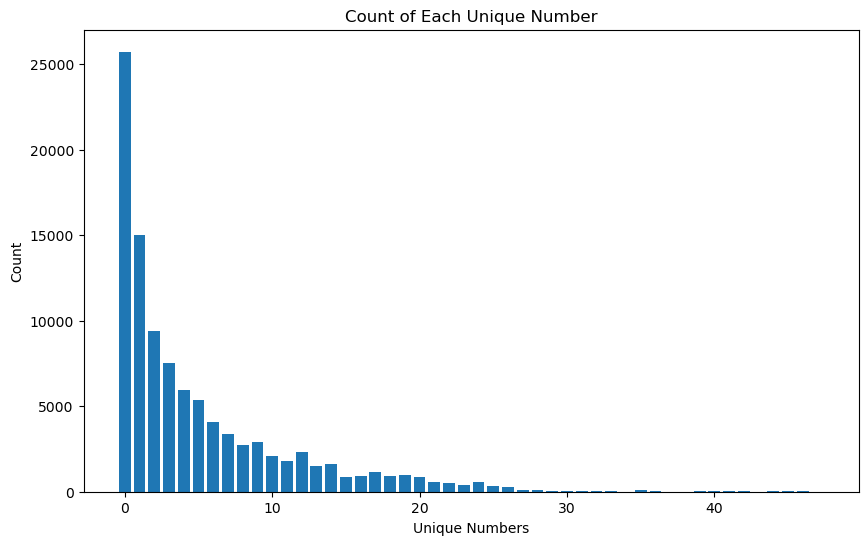

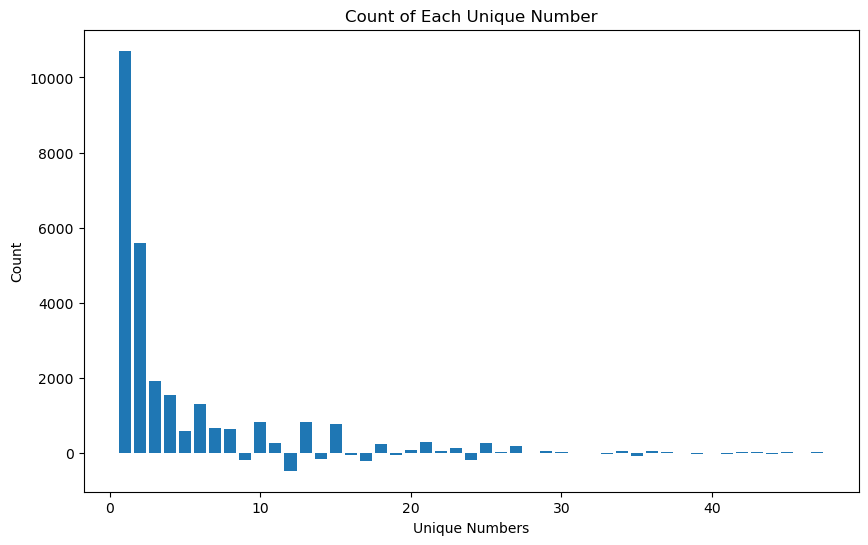

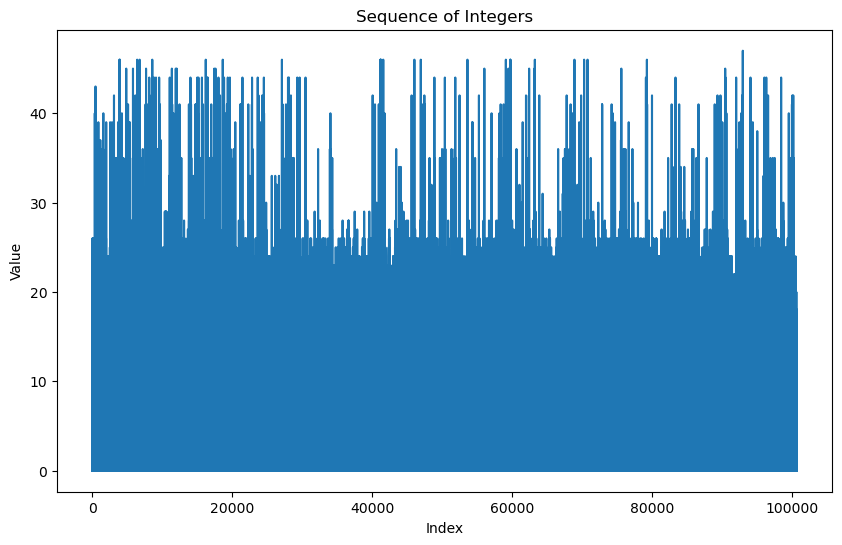

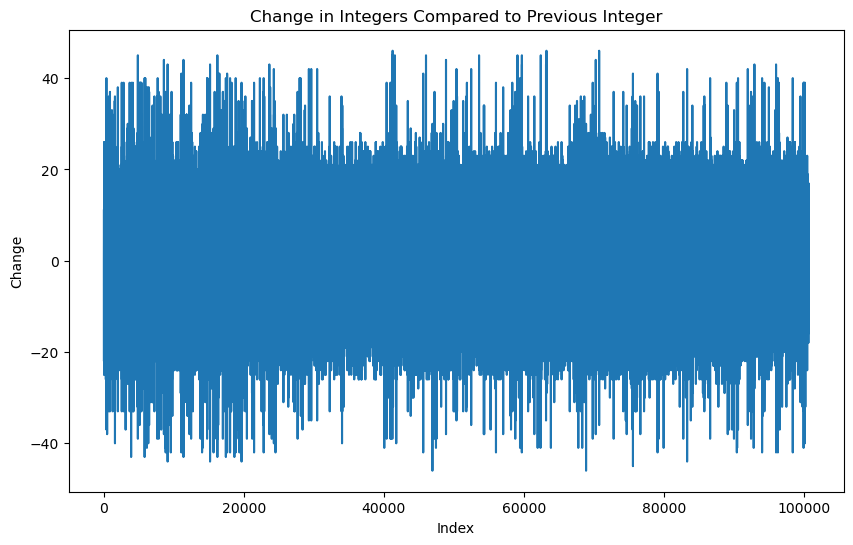

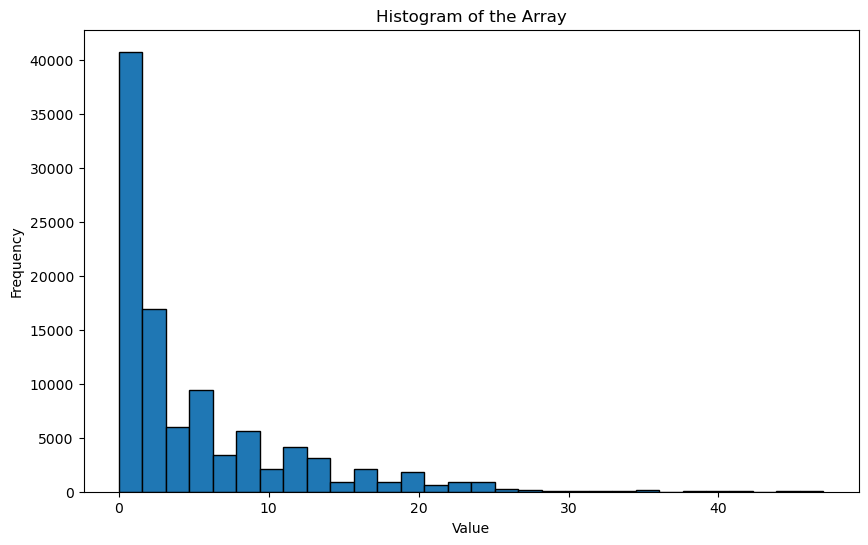

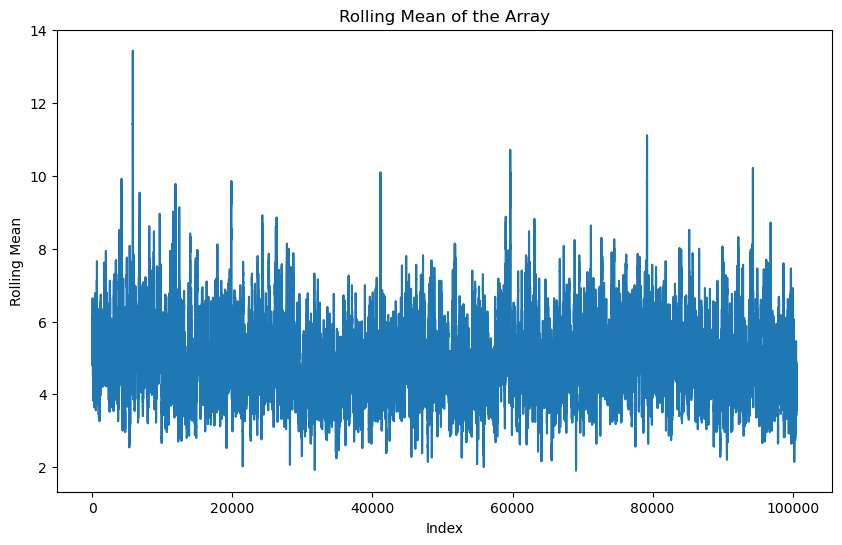

In [27]:
# 1. Plot the Count of Each Unique Number
unique, counts = np.unique(array, return_counts=True)
print(unique, counts)
plt.figure(figsize=(10, 6))
plt.bar(unique, counts)
plt.xlabel('Unique Numbers')
plt.ylabel('Count')
plt.title('Count of Each Unique Number')
plt.show()


# 1.1
counts2 = [ counts[i-1] - counts[i] for i in range(1, len(counts))]
plt.figure(figsize=(10, 6))
plt.bar(unique[1:], counts2)
plt.xlabel('Unique Numbers')
plt.ylabel('Count')
plt.title('Count of Each Unique Number')
plt.show()


# 2. Plot the Sequence of Integers
plt.figure(figsize=(10, 6))
plt.plot(array)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Sequence of Integers')
plt.show()

# 3. Plot the Change in Integers
changes = np.diff(array)
plt.figure(figsize=(10, 6))
plt.plot(changes)
plt.xlabel('Index')
plt.ylabel('Change')
plt.title('Change in Integers Compared to Previous Integer')
plt.show()

# 4. Plot the Histogram of the Array
plt.figure(figsize=(10, 6))
plt.hist(array, bins=30, edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of the Array')
plt.show()

# 5. Plot the Rolling Mean of the Array
window_size = 50
rolling_mean = np.convolve(array, np.ones(window_size)/window_size, mode='valid')
plt.figure(figsize=(10, 6))
plt.plot(rolling_mean)
plt.xlabel('Index')
plt.ylabel('Rolling Mean')
plt.title('Rolling Mean of the Array')
plt.show()

[5.025 5.406 5.141 5.478 5.344 5.699 5.627 5.07  5.59  5.417 4.845 5.803
 5.105 4.793 4.958 5.367 4.756 5.139 5.042 5.567 4.988 4.94  4.733 5.137
 5.186 4.87  5.721 5.242 5.285 4.299 4.578 4.576 4.489 4.455 4.361 4.467
 4.683 4.874 4.622 4.595 4.823 5.121 4.606 4.76  5.154 4.891 4.985 4.541
 5.169 4.982 4.929 4.916 4.434 4.441 4.651 4.512 4.726 4.554 5.276 5.823
 4.792 5.068 5.13  5.01  4.523 4.654 4.761 5.15  4.894 4.913 5.065 5.094
 5.368 4.973 5.102 5.282 5.222 5.34  5.116 5.404 5.256 5.174 4.698 5.265
 4.967 5.439 4.899 4.641 4.916 4.7   4.973 4.929 5.26  4.563 5.542 4.595
 5.201 4.561 4.632 4.857]


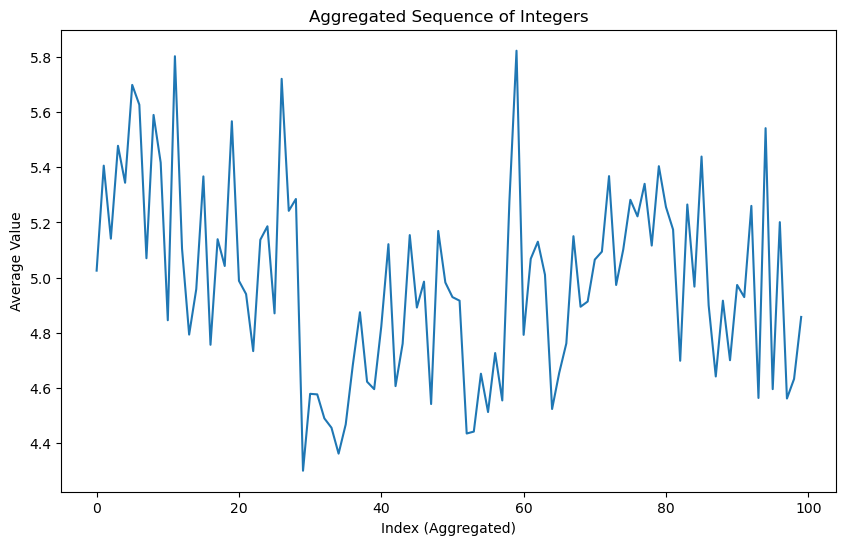

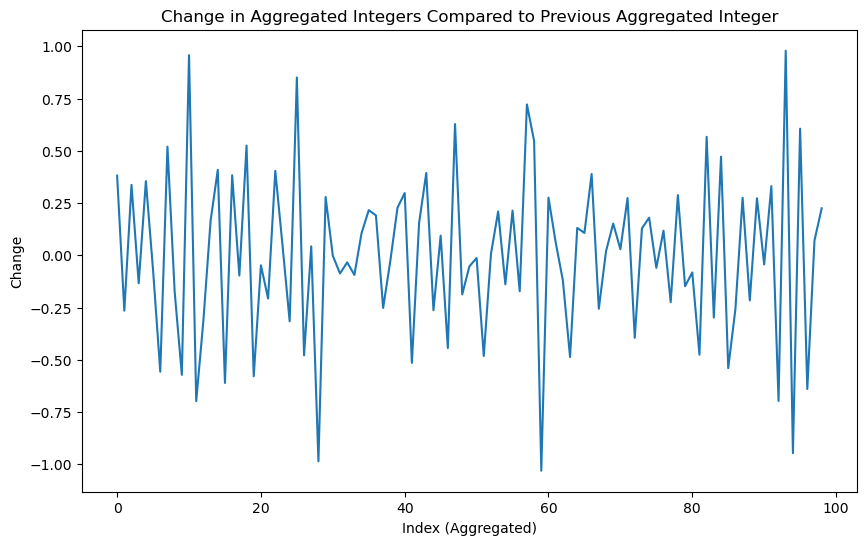

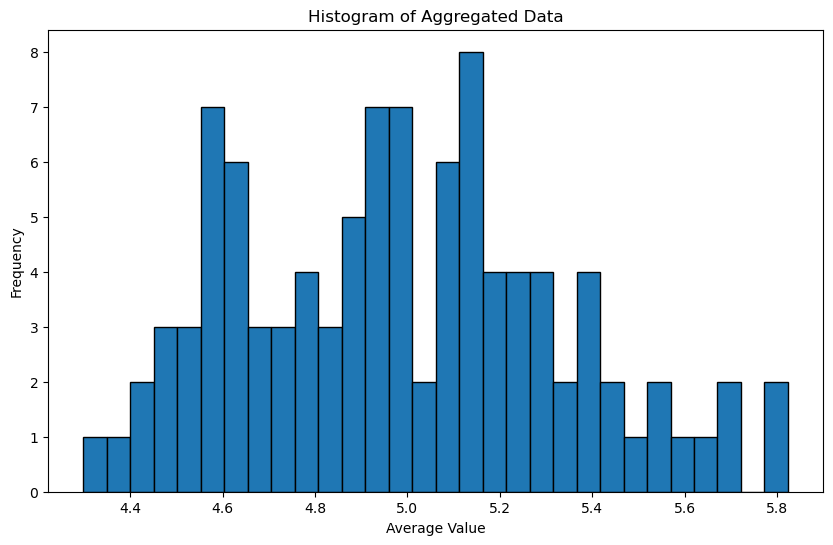

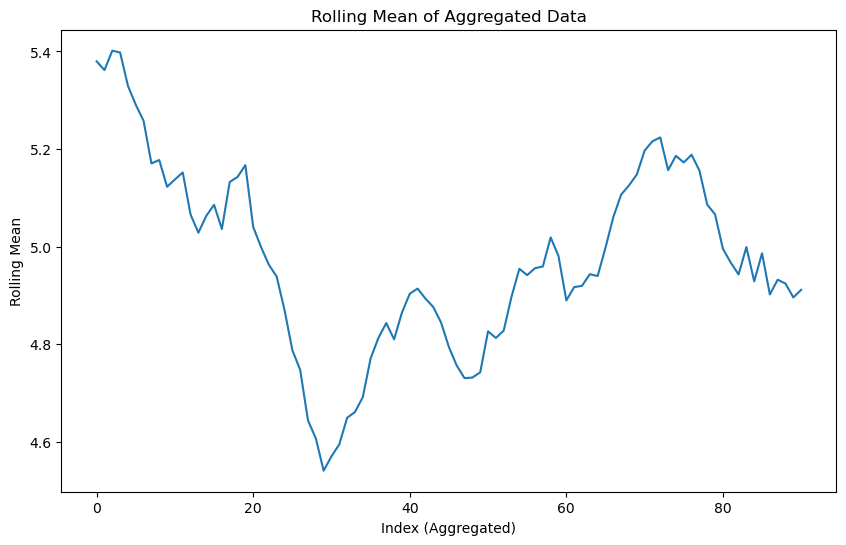

In [9]:


# Trim the array to the largest size divisible by 100
trimmed_size = (array.size // 1000) * 1000
trimmed_array = array[:trimmed_size]

# Aggregate the data by taking the average of every 100 points
aggregated_data = np.mean(trimmed_array.reshape(-1, 1000), axis=1)

# Print the aggregated data to verify
print(aggregated_data)

# 1. Plot the Aggregated Sequence of Integers
plt.figure(figsize=(10, 6))
plt.plot(aggregated_data)
plt.xlabel('Index (Aggregated)')
plt.ylabel('Average Value')
plt.title('Aggregated Sequence of Integers')
plt.show()

# 2. Plot the Change in Aggregated Integers
aggregated_changes = np.diff(aggregated_data)
plt.figure(figsize=(10, 6))
plt.plot(aggregated_changes)
plt.xlabel('Index (Aggregated)')
plt.ylabel('Change')
plt.title('Change in Aggregated Integers Compared to Previous Aggregated Integer')
plt.show()

# 3. Plot the Histogram of Aggregated Data
plt.figure(figsize=(10, 6))
plt.hist(aggregated_data, bins=30, edgecolor='black')
plt.xlabel('Average Value')
plt.ylabel('Frequency')
plt.title('Histogram of Aggregated Data')
plt.show()

# 4. Plot the Rolling Mean of Aggregated Data
window_size = 10
rolling_mean_aggregated = np.convolve(aggregated_data, np.ones(window_size)/window_size, mode='valid')
plt.figure(figsize=(10, 6))
plt.plot(rolling_mean_aggregated)
plt.xlabel('Index (Aggregated)')
plt.ylabel('Rolling Mean')
plt.title('Rolling Mean of Aggregated Data')
plt.show()



In [ ]:
def burrows_wheeler_transform(input_array):
    """
    Perform the Burrows-Wheeler Transform on an array of numbers.
    
    Parameters:
        input_array (list or array): The input array of numbers.

    Returns:
        list: The BWT transformed array of numbers.
    """
    # Ensure input is a list
    input_array = list(input_array)
    n = len(input_array)
    
    # Append a sentinel value that is unique and less than any element in the array
    # Assuming input_array contains integers, we can use min(input_array) - 1
    sentinel = min(input_array) - 1
    input_array.append(sentinel)
    n += 1  # Update the length after adding the sentinel
    
    # Generate suffix indices
    suffixes = [i for i in range(n)]
    
    # Sort suffixes using the elements starting from each index
    suffixes.sort(key=lambda i: input_array[i:])
    
    # Build the BWT by taking the element before each suffix start index
    bwt_array = [input_array[(i - 1) % n] for i in suffixes]
    
    # Remove the sentinel from the result if present
    bwt_array = [num for num in bwt_array if num != sentinel]
    
    return bwt_array
  
  


# Perform BWT
transformed_array = burrows_wheeler_transform(array)

# 1. Plot the Count of Each Unique Number
unique, counts = np.unique(transformed_array, return_counts=True)
print(unique, counts)
plt.figure(figsize=(10, 6))
plt.bar(unique, counts)
plt.xlabel('Unique Numbers')
plt.ylabel('Count')
plt.title('Count of Each Unique Number')
plt.show()

KeyboardInterrupt: 

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 13, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt: 


({'a', 'c', 'e', 'h', 'p', 'r', 's', 't'},
 'sh\x00tcaerp',
 {'c': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0],
  'p': [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
  'r': [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
  'e': [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0],
  's': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
  't': [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0],
  '\x00': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0],
  'h': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
  'a': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0]},
 {'a': 0, 'c': 1, 'e': 2, 'h': 3, 'p': 4, 'r': 5, 's': 6, 't': 7},
 [8, 2, 0, 5, 1, 3, 6, 7, 4])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47] [11853 10782  8730  8277  7046  6306  5574  4982  4487  4032  3480  3059
  2782  2516  2163  1996  1774  1576  1429  1207  1068   982   823   789
   630   515   389   329   226   165   139    99    80    64    41    39
    37    28    29    29    22    22    19    12     5     1     3     2]


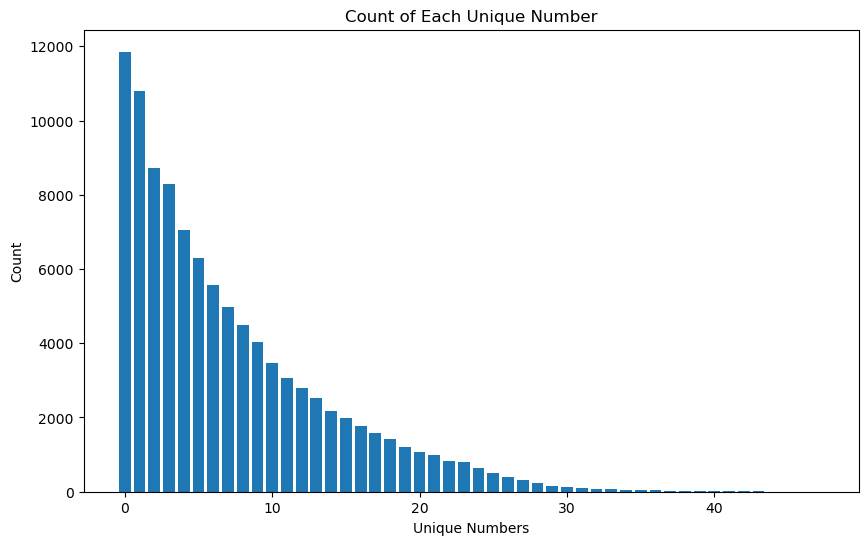

In [19]:
unique, counts = np.unique(transformed_array, return_counts=True)
print(unique, counts)
plt.figure(figsize=(10, 6))
plt.bar(unique, counts)
plt.xlabel('Unique Numbers')
plt.ylabel('Count')
plt.title('Count of Each Unique Number')
plt.show()

In [25]:
import numpy as np

BLOCK_SIZE = 4096

def compare_presorted(s1, s2, block, block_size):
    offset1 = s1 + 2
    offset2 = s2 + 2

    for i in range(2, block_size):
        if offset1 >= block_size:
            offset1 -= block_size
        if offset2 >= block_size:
            offset2 -= block_size

        c1 = block[offset1]
        c2 = block[offset2]

        if c1 > c2:
            return 1
        elif c2 > c1:
            return -1

        offset1 += 1
        offset2 += 1

    return 0

def bw_transform(input_array, method):
    block = np.array(input_array, dtype=np.uint8)
    block_size = len(block)

    rotation_idx = np.zeros(block_size, dtype=np.int32)
    v = np.zeros(block_size, dtype=np.int32)
    last = np.zeros(block_size, dtype=np.uint8)

    counters = np.zeros(256, dtype=np.int32)
    offset_table = np.zeros(256, dtype=np.int32)

    for i in range(block_size):
        counters[block[i]] += 1

    offset_table[0] = 0
    for i in range(1, 256):
        offset_table[i] = offset_table[i - 1] + counters[i - 1]

    for i in range(block_size - 1):
        j = block[i + 1]
        v[offset_table[j]] = i
        offset_table[j] += 1

    j = block[0]
    v[offset_table[j]] = block_size - 1

    offset_table[0] = 0
    for i in range(1, 256):
        offset_table[i] = offset_table[i - 1] + counters[i - 1]

    for i in range(block_size):
        j = v[i]
        j = block[j]
        rotation_idx[offset_table[j]] = v[i]
        offset_table[j] += 1

    for i in range(256):
        for j in range(256):
            first = np.where((block[rotation_idx] == i) & (block[(rotation_idx + 1) % block_size] == j))[0]
            if len(first) > 1:
                rotation_idx[first] = np.sort(rotation_idx[first], kind='mergesort')

    s0_idx = np.where(rotation_idx == 0)[0][0]
    for i in range(block_size):
        if rotation_idx[i] != 0:
            last[i] = block[rotation_idx[i] - 1]
        else:
            last[i] = block[block_size - 1]

    if method == 'XFORM_WITH_MTF':
        last = do_mtf(last)

    return s0_idx, last

def do_mtf(last):
    list_ = np.arange(256, dtype=np.uint8)
    encoded = np.zeros_like(last)

    for i in range(len(last)):
        idx = np.where(list_ == last[i])[0][0]
        encoded[i] = idx
        list_ = np.delete(list_, idx)
        list_ = np.insert(list_, 0, last[i])

    return encoded

def bw_reverse_transform(s0_idx, last, method):
    block_size = len(last)

    if method == 'XFORM_WITH_MTF':
        last = undo_mtf(last)

    count = np.zeros(256, dtype=np.int32)
    pred = np.zeros(block_size, dtype=np.int32)
    unrotated = np.zeros(block_size, dtype=np.uint8)

    for i in range(block_size):
        pred[i] = count[last[i]]
        count[last[i]] += 1

    sum_ = 0
    for i in range(256):
        j = count[i]
        count[i] = sum_
        sum_ += j

    i = s0_idx
    for j in range(block_size, 0, -1):
        unrotated[j - 1] = last[i]
        i = pred[i] + count[last[i]]

    return unrotated

def undo_mtf(last):
    list_ = np.arange(256, dtype=np.uint8)
    decoded = np.zeros_like(last)

    for i in range(len(last)):
        decoded[i] = list_[last[i]]
        list_ = np.delete(list_, last[i])
        list_ = np.insert(list_, 0, decoded[i])

    return decoded

# Example Usage
input_array = np.array(array, dtype=np.uint8)
method = 'XFORM_WITH_MTF'

# Perform BWT
s0_idx, transformed_array = bw_transform(input_array, method)
print("Transformed Array:", transformed_array)

# Reverse BWT
# reversed_array = bw_reverse_transform(s0_idx, transformed_array, method)
# print("Reversed Array:", reversed_array)

Transformed Array: [ 2  1 24 ... 15  2 14]


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47] [21402 14933 11334  8922  7144  5780  4718  3999  3329  2825  2410  1970
  1748  1565  1275  1099  1013   823   693   589   506   418   343   304
   248   212   194   150   129   100    82    68    63    39    37    24
    26    22    13    17    21     8    12    14     8     4     3     2]


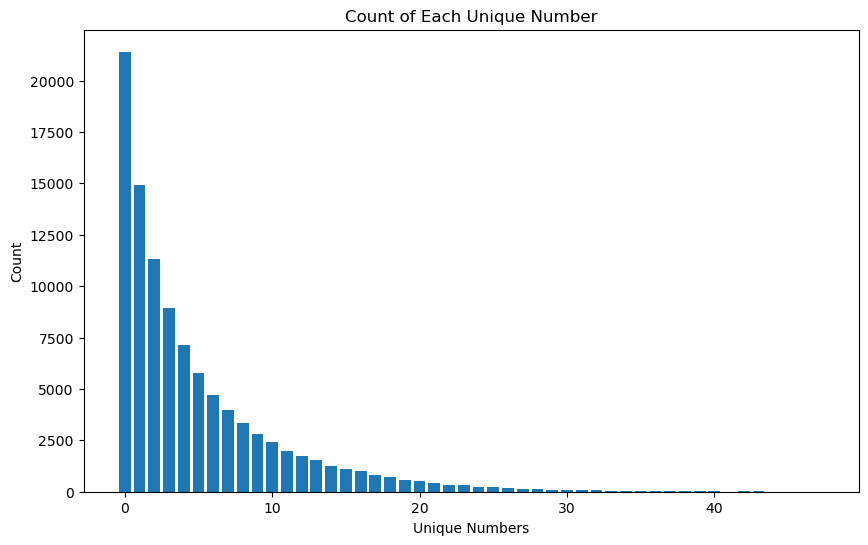

In [26]:
unique, counts = np.unique(transformed_array, return_counts=True)
print(unique, counts)
plt.figure(figsize=(10, 6))
plt.bar(unique, counts)
plt.xlabel('Unique Numbers')
plt.ylabel('Count')
plt.title('Count of Each Unique Number')
plt.show()